 # Problem 1

## a) For $2x^2+y^2+2z^2-3xy+xz-4yz$, with $v=[x,y,z]^T$:
## $$Q=\left[ \begin{array} {ccc}2&-3&1\\0&1&-4\\0&0&2\end{array} \right]$$
## in symmetric form:
## $$Q=\left[ \begin{array} {ccc}2&\frac{-3}{2}&\frac{1}{2}\\\frac{-3}{2}&1&-2\\\frac{1}{2}&-2&2\end{array} \right]$$

## b)

In [48]:
using LinearAlgebra
Q=[2 -3/2 1/2; -3/2 1 -2;1/2 -2 2]
(L,U) = (eigvals(Q),eigvecs(Q)) # L is the vector of eigenvalues and U is orthogonal
Q1=U * Diagonal(L) * U' # this is equal to Q (as long as Q was symmetric to begin with);

In [49]:
Q1

3×3 Array{Float64,2}:
  2.0  -1.5   0.5
 -1.5   1.0  -2.0
  0.5  -2.0   2.0

In [50]:
L

3-element Array{Float64,1}:
 -0.8701601197116658
  1.518494119904298
  4.351665999807368

## With an eigenvalue negative, the matrix A is not positive semi-definite. This means this constraint is not convex.

##  c) $‖Av‖_2^2−‖Bv‖_2^2\leq 0 $ can be express as $v^TA^TAv-v^TB^TBv$. We can express the arbitrary matrix $Q$ as the combination of eigenvalues and eigenvectors:$$Q=U^TLU$$
## where $L=diag(\lambda_1,\lambda_2,\lambda_3)$. So$$Q=U^T\Lambda UU^T\Lambda U$$
## where $\Lambda=diag(\sqrt{\lambda_1},\sqrt{\lambda_2},\sqrt{\lambda_3})(\lambda_1,\lambda_2,\lambda_3 > 0)$.
## $$\begin{align}
v^TQv&=v^TU^TLUv \\
&=v^TU^T(L_1-L_2)Uv\\
&=v^TU^TL_1Uv-v^TU^TL_2Uv\\
&=v^TU^T\Lambda_1UU^T\Lambda_1Uv-v^TU^T\Lambda_2UU^T\Lambda_2Uv\\
&=v^TA^TAv-v^TB^TBv\\
&=‖Av‖_2^2−‖Bv‖_2^2\end{align}$$
## where $A=U^T\Lambda_1U, B=U^T\Lambda_2U$. To make $L_1$, and $L_2$ positive semi-definite, $L_1=diag(|\lambda_1|,2|\lambda_2|,3|\lambda_3|)$, and $L_2=diag(2|\lambda_1|,1|\lambda_2|,2|\lambda_3|)$,  which satisfy the origional Q.

##  d) Explain how to find (x, y, z) that satisfy the above constraint but make $2x^2 + y^2 + 2z^2$ arbitrarily large.

## $2x^2 + y^2 + 2z^2$ is a quadratic objective function:$$min -2x^2 - y^2 - 2z^2$$
## By using the equivalent constraint:
## $$‖Av‖_2^2<=t$$
## $$-‖Bv‖_2^2<=-t$$

 # Problem 2

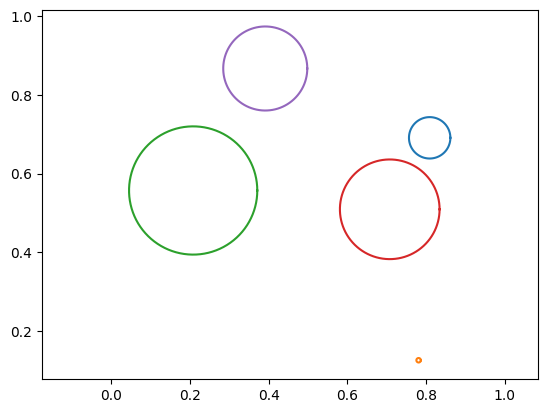

In [30]:
n = 5
using Random, PyPlot
r = [rand()*0.2 for i in 1:n] # randomly generate n radii with length between 0,and 0.2
# randomly generate n points with (x,y) coords between 0 and 1
c = [rand() for i in 1:n, j in 1:2]
t = range(0,stop=2*pi,length=100) # parameter that traverses the circle
# for each of the n points
for i in 1:n
    # plot circle radius r[i] with center (x[i],y[i])
    plot( c[i,1] .+ r[i]*cos.(t), c[i,2] .+ r[i]*sin.(t))
end
axis("equal"); # make x and y scales equal

In [39]:
using JuMP, Ipopt
m = Model(Ipopt.Optimizer)

set_optimizer_attribute(m,"print_level",0)

@variable(m, x[1:2] >= 0)
@variable(m, R >= 0)

@NLconstraint(m,contain[i in 1:n],(x[1]-c[i,1])^2+(x[2]-c[i,2])^2 <= (R-r[i])^2)

@constraint(m,radius[i in 1:n],R >= r[i])

@objective(m, Min, R)
optimize!(m)

x = value.(x)
R = value.(R)
println("The center is:", x)
println("The radius is:", R)

The center is:[0.5208534008579923, 0.5193672285822005]
The radius is:0.478022323104554


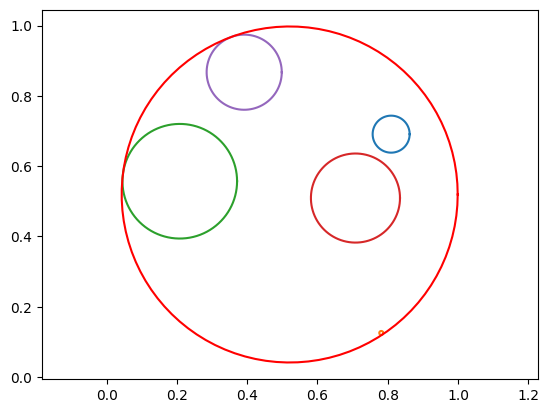

In [44]:
using PyPlot
for i in 1:n
    # plot circle radius r[i] with center (x[i],y[i])
    plot( c[i,1] .+ r[i]*cos.(t), c[i,2] .+ r[i]*sin.(t))
end

plot(x[1] .+ R*cos.(t), x[2] .+ R*sin.(t), "r-")
axis("equal"); # make x and y scales equal

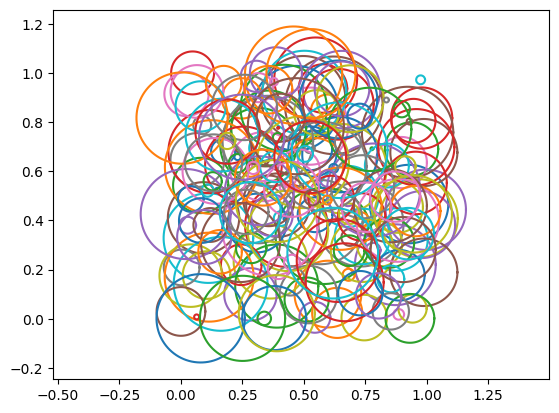

In [45]:
n = 200
using Random, PyPlot
r = [rand()*0.2 for i in 1:n] # randomly generate n radii with length between 0,and 0.2
# randomly generate n points with (x,y) coords between 0 and 1
c = [rand() for i in 1:n, j in 1:2]
t = range(0,stop=2*pi,length=100) # parameter that traverses the circle
# for each of the n points
for i in 1:n
    # plot circle radius r[i] with center (x[i],y[i])
    plot( c[i,1] .+ r[i]*cos.(t), c[i,2] .+ r[i]*sin.(t))
end
axis("equal"); # make x and y scales equal

In [46]:
using JuMP, Ipopt
m = Model(Ipopt.Optimizer)

set_optimizer_attribute(m,"print_level",0)

@variable(m, x[1:2] >= 0)
@variable(m, R >= 0)

@NLconstraint(m,contain[i in 1:n],(x[1]-c[i,1])^2+(x[2]-c[i,2])^2 <= (R-r[i])^2)

@constraint(m,radius[i in 1:n],R >= r[i])

@objective(m, Min, R)
optimize!(m)

x = value.(x)
R = value.(R)
println("The center is:", x)
println("The radius is:", R)

The center is:[0.45069319100970967, 0.45532689429030687]
The radius is:0.7646030565968583


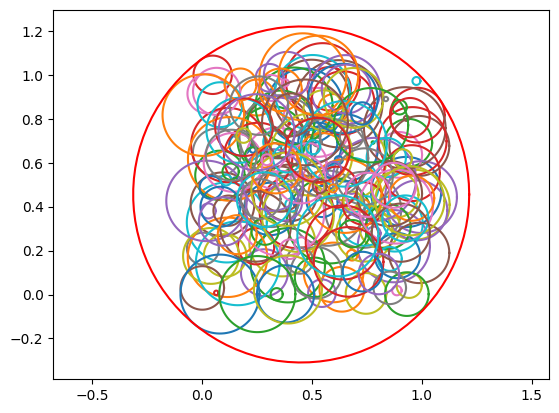

In [47]:
using PyPlot
for i in 1:n
    # plot circle radius r[i] with center (x[i],y[i])
    plot( c[i,1] .+ r[i]*cos.(t), c[i,2] .+ r[i]*sin.(t))
end

plot(x[1] .+ R*cos.(t), x[2] .+ R*sin.(t), "r-")
axis("equal"); # make x and y scales equal